In [16]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy
from scipy.special import erf
from scipy import log, exp, sqrt
from IPython.display import HTML, Latex, Math,display

In [17]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<a href="javascript:code_toggle()">Mostra/Nascondi celle</a>.''')

# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
# Valentina Guarino, mat. 978477

## <span style="color:red">  ESERCITAZIONE 4</span>

Il codice di dinamica molecolare utilizzato simula il comportamento al variare del tempo di un sistema (solido, liquido, gassoso) di $Argon$ sottoposto ad un potenziale di interazione di tipo Lennard-Jones:

$$V_{LJ} = 4\epsilon \big[\big(\frac{\sigma}{r}\big)^{12}-\big(\frac{\sigma}{r}\big)^6\big]$$

con $\epsilon$ unità di energia e $\sigma$ unità di lunghezza. 

La simulazione avviene in un sistema microcanonico $(N,V,E)$ -per il quale deve valere la conservazione dell'energia totale- e le equazioni del moto vengono integrate utilizzando un algoritmo di Verlet, il quale necessita sia delle posizioni $\vec{r}(t)$ sia di quelle $\vec{r}(t-\delta t)$:

$$\vec{r}(t+\delta t)\simeq 2\vec{r}(t) - \vec{r}(t-\delta t) + \delta t^2 \vec{a}(t)$$

Poiché l'algoritmo di Verlet non richiede l'utilizzo delle velocità, esse possono essere ricavate come 

$$\vec{v}(t) = \frac{\vec{r}(t+ \delta t) - \vec{r}(t - \delta t)}{2\delta t}$$

### Esercizio 04.1: Implementazione del restart e fase di equilibrazione

Si è modificato il codice per la dinamica molecolare aggiungendo una variabile $restart$ di tipo booleano:
- Se $restart = 0$ (ad esempio durante la prima simulazione) non utilizzo le posizioni al tempo precedente $\vec{r}(t - \delta t)$, e le velocità $\vec{v}(t)$ vengono generate in modo random. 
- Se $restart = 1$ utilizzo  le posizioni al tempo precedente $\vec{r}(t - \delta t)$, e le velocità vengono valutate secondo l'algoritmo di Verlet. 

I grafici seguenti mostrano l'andamento dell'energia potenziale $E_{pot}$ e dell'energia cinetica $E_{kin}$ (in unità di Lennard-Jones) sia dopo una sola simulazione (ponendo $restart = 0$) sia dopo una fase di equilibrazione che consta di un numero diverso di simulazioni (con $restart = 1$) in base al tipo di stato simulato. 

In particolare per il _solido_ la durata della fase di equilibrazione è stata di **6** simulazioni, per il _liquido_ di **5** simulazioni e per il _gas_ di **4** simulazioni.
Le simulazioni vengono svolte per un numero di steps pari a $M = 5 \cdot 10^3$.

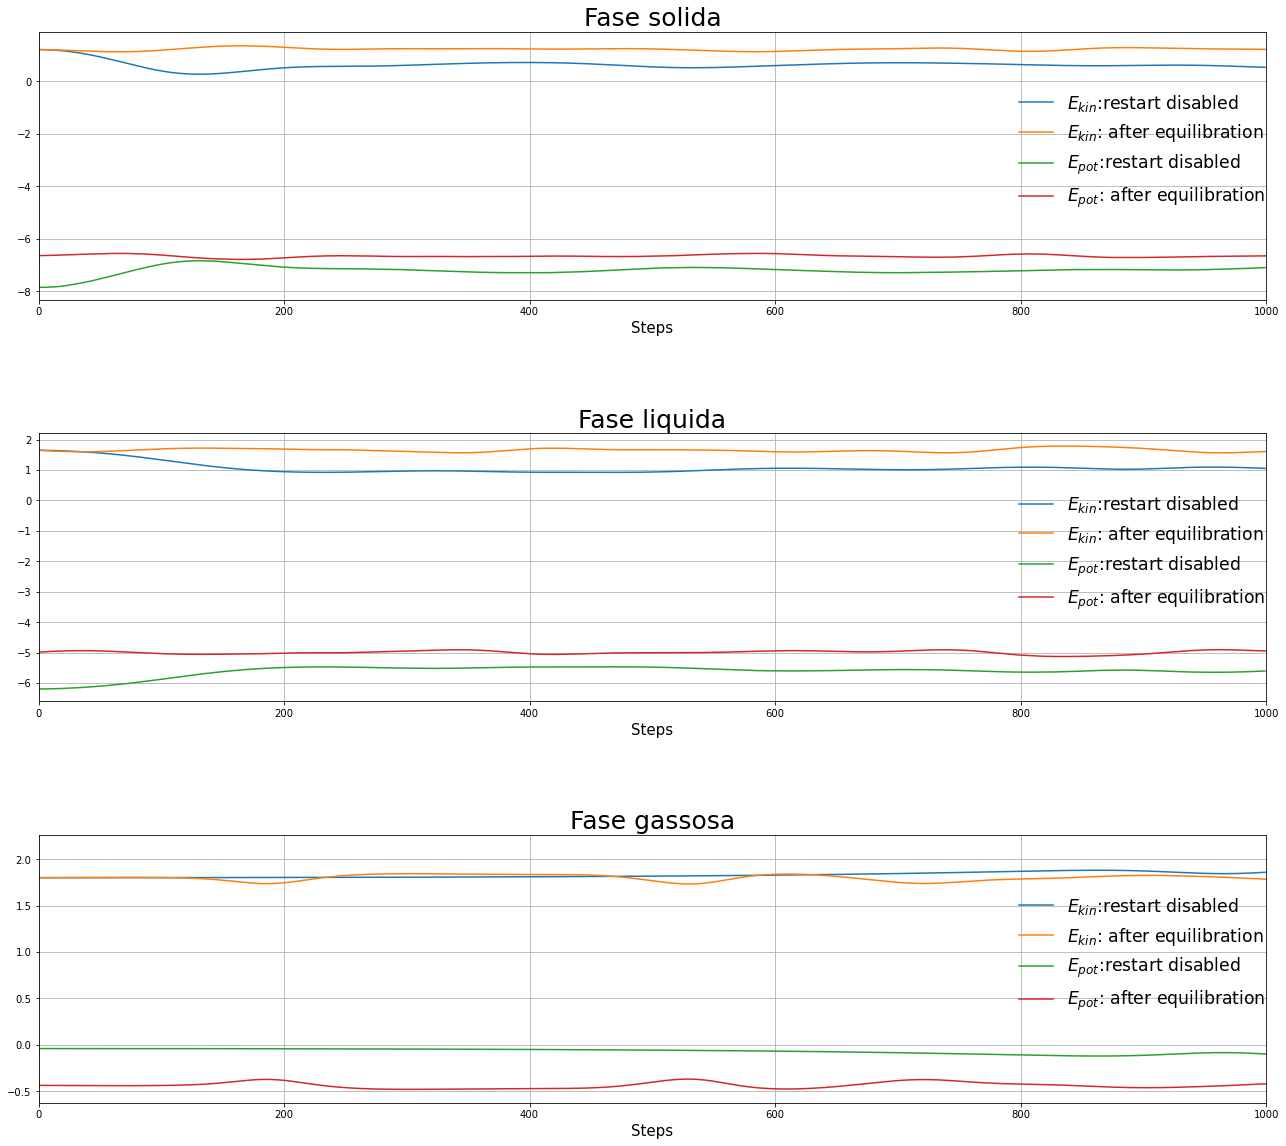

In [12]:
##Equilibrazione del sistema##
plt.figure(figsize=(22,17))

#Fase solida
plt.subplot(3,1,1)
epot = np.loadtxt("Solido/output_epot6.dat", usecols = 0, unpack=True)
ekin = np.loadtxt("Solido/output_ekin6.dat", usecols = 0, unpack=True)

epot_old = np.loadtxt("Solido/epot_old.dat", usecols = 0, unpack=True)
ekin_old = np.loadtxt("Solido/ekin_old.dat", usecols = 0, unpack=True)

plt.plot(ekin_old,label = "$E_{kin}$:restart disabled")
plt.plot(ekin,label = "$E_{kin}$: after equilibration")
plt.plot(epot_old,label = "$E_{pot}$:restart disabled")
plt.plot(epot,label = "$E_{pot}$: after equilibration")

plt.legend(bbox_to_anchor=(1.005, 0.8), loc='best', borderaxespad=0., frameon = False, fontsize = "xx-large")
plt.xlabel("Steps", fontsize = 15)
plt.title("Fase solida", fontsize = 25)
plt.xlim(0,1000)
plt.grid(True)

#Fase liquida
plt.subplot(3,1,2)
epot = np.loadtxt("Liquido/output_epot5.dat", usecols = 0, unpack=True)
ekin = np.loadtxt("Liquido/output_ekin5.dat", usecols = 0, unpack=True)

epot_old = np.loadtxt("Liquido/epot_old.dat", usecols = 0, unpack=True)
ekin_old = np.loadtxt("Liquido/ekin_old.dat", usecols = 0, unpack=True)


plt.plot(ekin_old,label = "$E_{kin}$:restart disabled")
plt.plot(ekin,label = "$E_{kin}$: after equilibration")
plt.plot(epot_old,label = "$E_{pot}$:restart disabled")
plt.plot(epot,label = "$E_{pot}$: after equilibration")

plt.legend(bbox_to_anchor=(1.005, 0.8), loc='best', borderaxespad=0.,frameon = False, fontsize = "xx-large")
plt.xlabel("Steps", fontsize = 15)
plt.title("Fase liquida", fontsize = 25)
plt.xlim(0,1000)
plt.grid(True)

#Fase gassosa
plt.subplot(3,1,3)
epot = np.loadtxt("Gas/output_epot4.dat", usecols = 0, unpack=True)
ekin = np.loadtxt("Gas/output_ekin4.dat", usecols = 0, unpack=True)

epot_old = np.loadtxt("Gas/epot_old.dat", usecols = 0, unpack=True)
ekin_old = np.loadtxt("Gas/ekin_old.dat", usecols = 0, unpack=True)


plt.plot(ekin_old,label = "$E_{kin}$:restart disabled")
plt.plot(ekin,label = "$E_{kin}$: after equilibration")
plt.plot(epot_old,label = "$E_{pot}$:restart disabled")
plt.plot(epot,label = "$E_{pot}$: after equilibration")

plt.legend(bbox_to_anchor=(1.005, 0.8), loc='best', borderaxespad=0.,frameon = False, fontsize = "xx-large")
plt.xlabel("Steps", fontsize = 15)
plt.title("Fase gassosa", fontsize = 25)
plt.xlim(0,1000)
plt.grid(True)

plt.subplots_adjust(top=1.,hspace=0.5)
plt.show()

Dai grafici si può notare come, durante la prima simulazione, le quantità misurate impieghino diversi steps MonteCarlo per raggiungere un valore di equilibrio. 

Ciò è dovuto al fatto che durante la prima simulazione il sistema parte in uno stato ordinato (ad esempio uno stato cristallino nel caso della simulazione del solido) nel quale si ha un valore di $E_{pot}$ inferiore rispetto a quello che si ha nel suo stato più disordinato (ad esempio di solido non perfetto). Durante l'avanzare della simulazione vi è un aumento dell'energia potenziale, con una conseguente diminuzione dell'energia cinetica e della temperatura, il che porta il sistema nel suo stato di equilibrio.

Utilizzare un $restart = 1$ durante la fase di equilibrazione ci permette di riscalare più accuratamente le velocità, con un fattore di scala 
$$fs = \sqrt{\frac{3T_{target}}{\frac{(v_x^2+v_y^2+v_z^2)}{n}}}$$
che dipende dalla $T$ target impostata all'inizio della simulazione e dal numero di particelle $n$ simulate (nel nostro caso $n = 108$). Dunque, poiché le temperature vengono calcolate utilizzando il principio di equipartizione dell'energia $E_{kin} = \frac{3}{2}k_B T$, ponendo $k_B = 1$, riscalare in modo più accurato le velocità porterà il sistema ad equilibrare più velocemente, raggiungendo più facilmente il valore target della simulazione.

Nei seguenti grafici vengono mostrati i valori istantanei della **temperatura** nei primi $150$ steps MC durante la _fase di equilibrazione_ del sistema. 

Si può valutare l'oscillazione dei valori istantanei della temperatura attorno al valore di equilibrio (dato dalle temperatura target per ogni diverso sistema) all'aumentare del numero delle equilibrazioni:

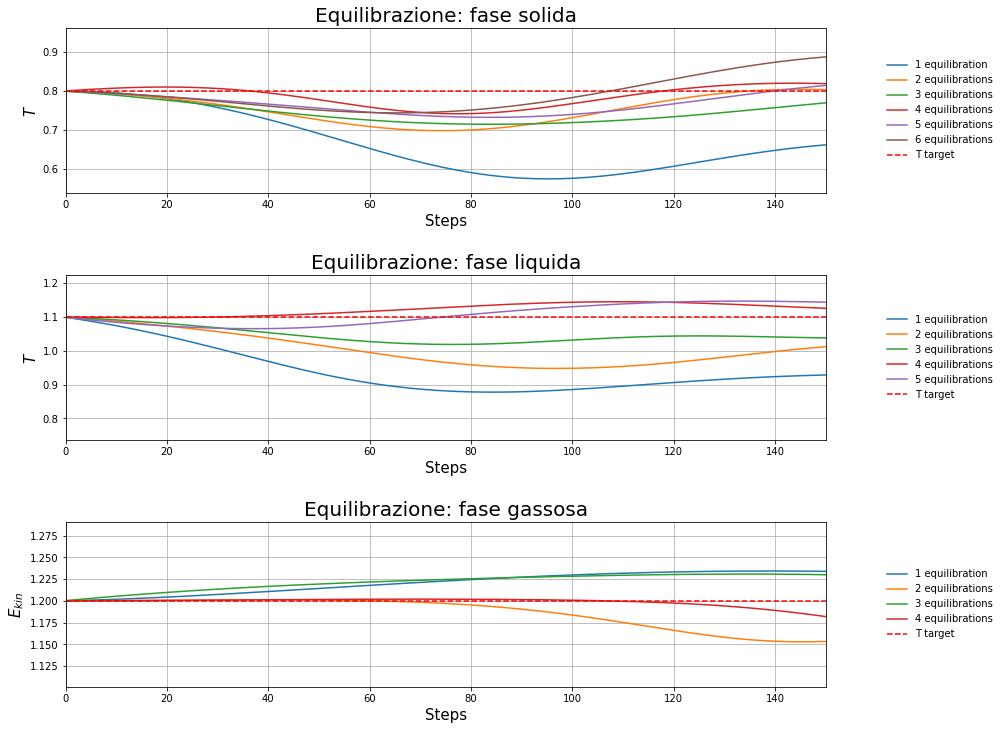

In [13]:
plt.figure(figsize = (14,7))
plt.subplot(3,1,1)
temp1 = np.loadtxt("Solido/output_temp1.dat", usecols = 0, unpack=True)
temp2 = np.loadtxt("Solido/output_temp2.dat", usecols = 0, unpack=True)
temp3 = np.loadtxt("Solido/output_temp3.dat", usecols = 0, unpack=True)
temp4 = np.loadtxt("Solido/output_temp4.dat", usecols = 0, unpack=True)
temp5 = np.loadtxt("Solido/output_temp5.dat", usecols = 0, unpack=True)
temp6 = np.loadtxt("Solido/output_temp6.dat", usecols = 0, unpack=True)

plt.plot(temp1, label = "1 equilibration")
plt.plot(temp2, label = "2 equilibrations")
plt.plot(temp3, label = "3 equilibrations")
plt.plot(temp4, label = "4 equilibrations")
plt.plot(temp5, label = "5 equilibrations")
plt.plot(temp6, label = "6 equilibrations")
plt.title("Equilibrazione: fase solida", fontsize = 20)
plt.grid(True)
plt.xlim(0,150)
plt.xlabel("Steps", fontsize = 15)
plt.ylabel("$T$", fontsize = 15)
plt.axhline(y = 0.8, color = 'r', linestyle = '--', label = "T target")
plt.legend(bbox_to_anchor=(1.15, 0.501), loc='center', borderaxespad=0.5,frameon = False)

plt.subplot(3,1,2)
temp1 = np.loadtxt("Liquido/output_temp1.dat", usecols = 0, unpack=True)
temp2 = np.loadtxt("Liquido/output_temp2.dat", usecols = 0, unpack=True)
temp3 = np.loadtxt("Liquido/output_temp3.dat", usecols = 0, unpack=True)
temp4 = np.loadtxt("Liquido/output_temp4.dat", usecols = 0, unpack=True)
temp5 = np.loadtxt("Liquido/output_temp5.dat", usecols = 0, unpack=True)


plt.plot(temp1, label = "1 equilibration")
plt.plot(temp2, label = "2 equilibrations")
plt.plot(temp3, label = "3 equilibrations")
plt.plot(temp4, label = "4 equilibrations")
plt.plot(temp5, label = "5 equilibrations")

plt.title("Equilibrazione: fase liquida", fontsize = 20)
plt.grid(True)
plt.xlim(0,150)
plt.xlabel("Steps", fontsize = 15)
plt.ylabel("$T$", fontsize = 15)
plt.axhline(y = 1.1, color = 'r', linestyle = '--', label = "T target")
plt.legend(bbox_to_anchor=(1.15, 0.501), loc='center', borderaxespad=0.5,frameon = False)

plt.subplot(3,1,3)
temp1 = np.loadtxt("Gas/output_temp1.dat", usecols = 0, unpack=True)
temp2 = np.loadtxt("Gas/output_temp2.dat", usecols = 0, unpack=True)
temp3 = np.loadtxt("Gas/output_temp3.dat", usecols = 0, unpack=True)
temp4 = np.loadtxt("Gas/output_temp4.dat", usecols = 0, unpack=True)

plt.plot(temp1, label = "1 equilibration")
plt.plot(temp2, label = "2 equilibrations")
plt.plot(temp3, label = "3 equilibrations")
plt.plot(temp4, label = "4 equilibrations")

plt.title("Equilibrazione: fase gassosa", fontsize = 20)
plt.grid(True)
plt.xlim(0,150)
plt.xlabel("Steps", fontsize = 15)
plt.ylabel("$E_{kin}$", fontsize = 15)
plt.axhline(y = 1.2, color = 'r', linestyle = '--', label = "T target")
plt.legend(bbox_to_anchor=(1.15, 0.501), loc='center', borderaxespad=0.5,frameon = False)

plt.tight_layout()
plt.subplots_adjust(top=1.4,hspace=0.5)
plt.show()

Studiando inoltre l'andamento dell'**energia totale** si può notare come essa abbia delle fluttuazioni su piccola scala. Tuttavia, rispetto alle fluttuazioni di energia potenziale ed energia cinetica, essa è costante: ciò è dovuto all'applicazione dell'algoritmo di Verlet, che per lunghe scale temporali garantisce la conservazione dell'energia totale.

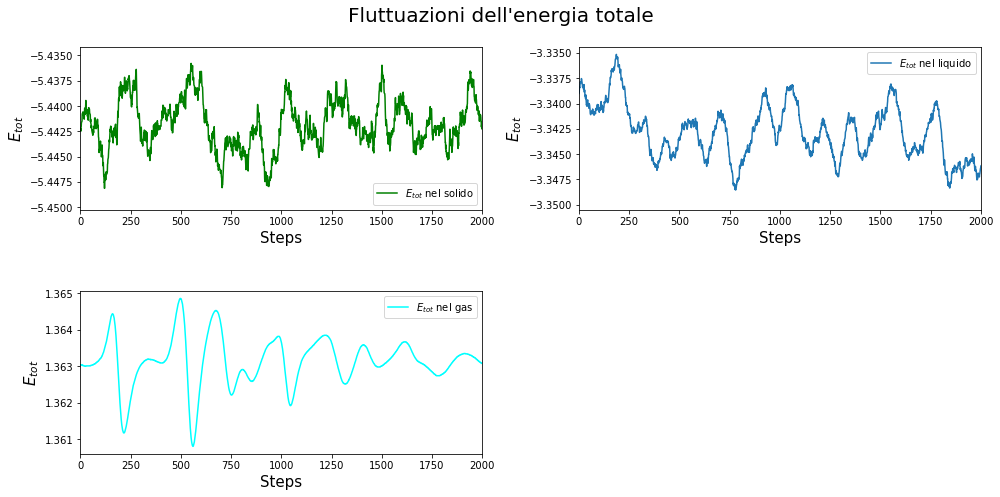

In [14]:
plt.figure(figsize=(14,7))
etot_solid = np.loadtxt("Solido/output_etot6.dat", usecols = 0, unpack=True)
etot_liquid = np.loadtxt("Liquido/output_etot5.dat", usecols = 0, unpack=True)
etot_gas = np.loadtxt("Gas/output_etot4.dat", usecols = 0, unpack=True)

plt.subplot(2,2,1)
plt.plot(etot_solid, label = "$E_{tot}$ nel solido", color = 'green')
plt.xlabel("Steps", fontsize = 15)
plt.ylabel("$E_{tot}$", fontsize = 15)
plt.xlim(0,2000)
plt.legend()

plt.subplot(2,2,2)
plt.plot(etot_liquid, label = "$E_{tot}$ nel liquido")
plt.xlabel("Steps", fontsize = 15)
plt.ylabel("$E_{tot}$", fontsize = 15)
plt.xlim(0,2000)
plt.legend()

plt.subplot(2,2,3)
plt.plot(etot_gas, label = "$E_{tot}$ nel gas", color = 'cyan')
plt.xlabel("Steps", fontsize = 15)
plt.ylabel("$E_{tot}$", fontsize = 15)
plt.xlim(0,2000)
plt.legend()

plt.suptitle("Fluttuazioni dell'energia totale", fontsize = 20)
plt.tight_layout()
plt.subplots_adjust(top=0.9,hspace=0.5)
plt.show()

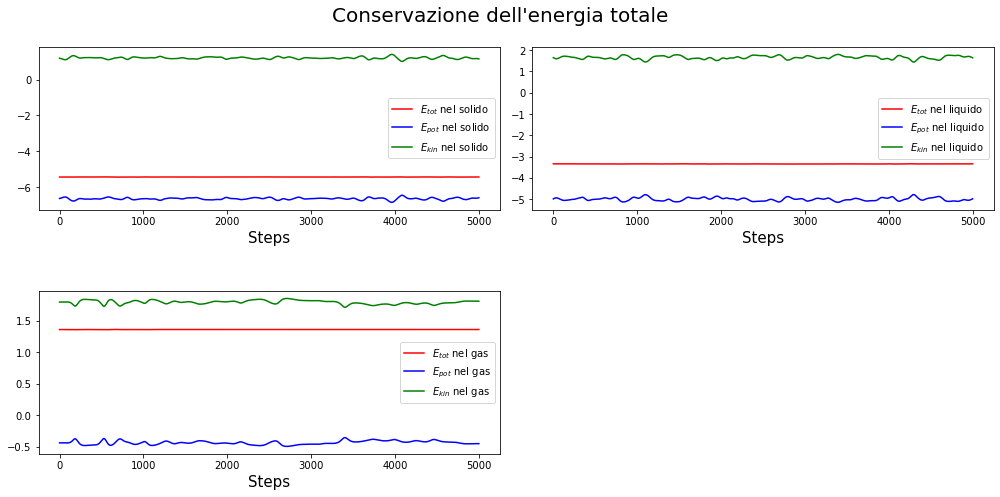

In [15]:
plt.figure(figsize=(14,7))
etot_solid = np.loadtxt("Solido/output_etot6.dat", usecols = 0, unpack=True)
etot_liquid = np.loadtxt("Liquido/output_etot5.dat", usecols = 0, unpack=True)
etot_gas = np.loadtxt("Gas/output_etot4.dat", usecols = 0, unpack=True)
epot_solid = np.loadtxt("Solido/output_epot6.dat", usecols = 0, unpack=True)
epot_liquid = np.loadtxt("Liquido/output_epot5.dat", usecols = 0, unpack=True)
epot_gas = np.loadtxt("Gas/output_epot4.dat", usecols = 0, unpack=True)
ekin_solid = np.loadtxt("Solido/output_ekin6.dat", usecols = 0, unpack=True)
ekin_liquid = np.loadtxt("Liquido/output_ekin5.dat", usecols = 0, unpack=True)
ekin_gas = np.loadtxt("Gas/output_ekin4.dat", usecols = 0, unpack=True)

plt.subplot(2,2,1)
plt.plot(etot_solid, label = "$E_{tot}$ nel solido", color = 'red')
plt.plot(epot_solid, label = "$E_{pot}$ nel solido", color = 'blue')
plt.plot(ekin_solid, label = "$E_{kin}$ nel solido", color = 'green')
plt.xlabel("Steps", fontsize = 15)
plt.legend()

plt.subplot(2,2,2)
plt.plot(etot_liquid, label = "$E_{tot}$ nel liquido", color = 'red')
plt.plot(epot_liquid, label = "$E_{pot}$ nel liquido", color = 'blue')
plt.plot(ekin_liquid, label = "$E_{kin}$ nel liquido", color = 'green')
plt.xlabel("Steps", fontsize = 15)
plt.legend()

plt.subplot(2,2,3)
plt.plot(etot_gas, label = "$E_{tot}$ nel gas", color = 'red')
plt.plot(epot_gas, label = "$E_{pot}$ nel gas", color = 'blue')
plt.plot(ekin_gas, label = "$E_{kin}$ nel gas", color = 'green')
plt.xlabel("Steps", fontsize = 15)
plt.legend()

plt.suptitle("Conservazione dell'energia totale", fontsize = 20)
plt.tight_layout()
plt.subplots_adjust(top=0.9,hspace=0.5)
plt.show()

### Esercizio 04.2, 04.3: Valori medi di energia e temperature

Viene implementato nel codice il calcolo delle diverse quantità macroscopiche utilizzando il metodo a blocchi per le incertezze statistiche.

Viene effettuato anche il calcolo della pressione tramite **teorema del viriale**:
$$ P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$

Vengono dunque svolte simulazioni per un modello Lennard-Jones dell'atomo di *Argon* nelle seguenti condizioni:
- _Fase solida_: $\rho^\star = 1.1$, $T^\star = 0.8$, raggio di cut-off $r_c = 2.2$
- _Fase liquida_: $\rho^\star = 0.8$, $T^\star = 1.1$, raggio di cut-off $r_c = 2.5$
- _Fase gassosa_: $\rho^\star = 0.05$, $T^\star = 1.2$, raggio di cut-off $r_c = 5.0$

Utilizzando dei valori di $\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K e $m=39.948$ amu si sono trasformate le varie quantità in unità del _SI_ tramite le seguenti eguaglianze:
$E_{pot} = E_{pot}^\star \cdot \epsilon$, $P = \frac{P^\star}{\sigma^3} \cdot \epsilon$, $T = T^\star \cdot \frac{\epsilon}{k_{B}}$, $\rho = \frac{\rho^\star}{\sigma^3}$


Vengono mostrati i grafici dei valor medi di energia potenziale, energia cinetica, energia  totale, pressione e temperatura. Quest'ultima viene inoltre confrontata con il valore target della temperatura, in unità del SI.

#### Valori medi per la fase solida

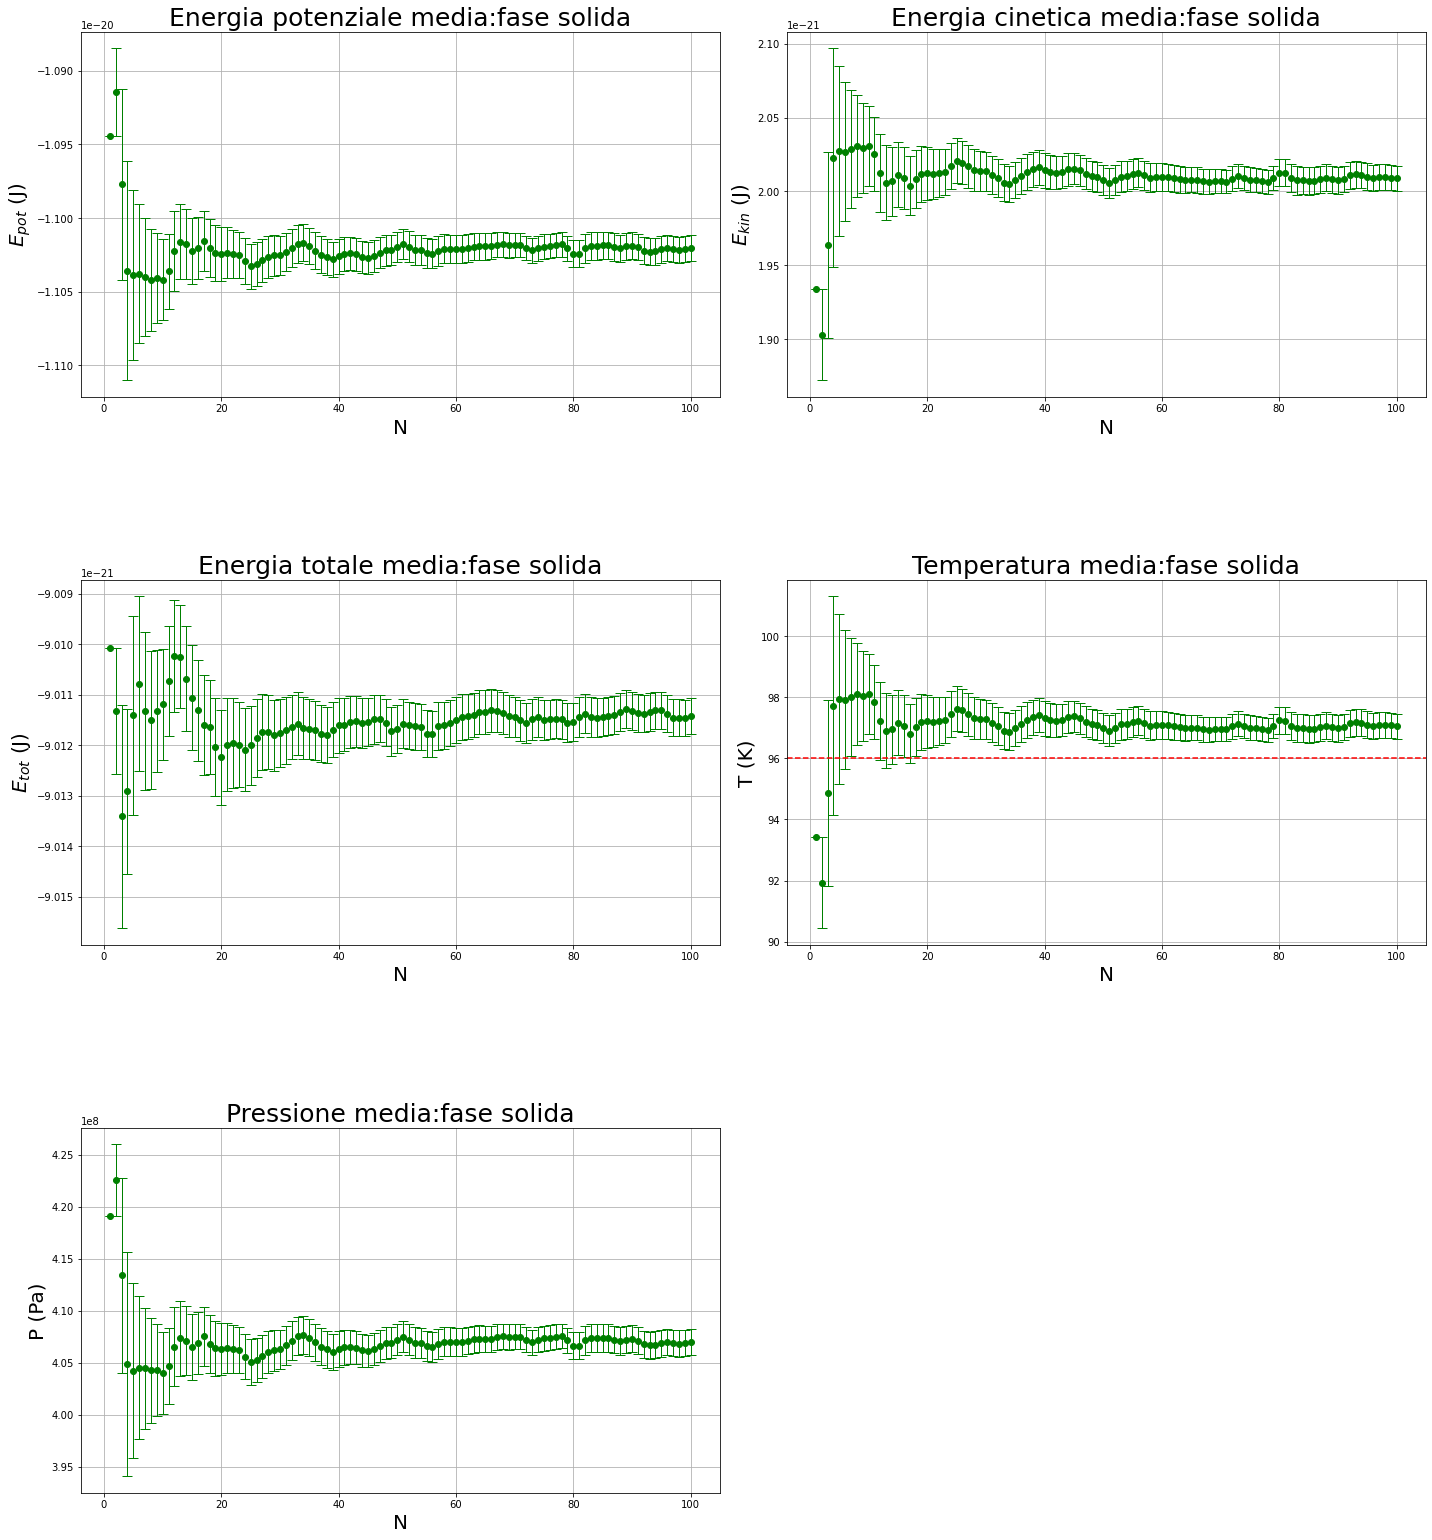

In [70]:
plt.figure(figsize=(20,14))

kB = 1.38 * 10**(-23)
eps = 120 * kB
sigma = 0.34 * 10**(-9)
m = 39.948 * 1.66 * 10 **(-27)

plt.subplot(3,2,1)
N, epot_mean, std_epot = np.loadtxt("Solido/ave_epot.dat", usecols = (0,2,3), unpack=True)
plt.errorbar(N, epot_mean*eps, yerr=std_epot*eps, fmt = "go", capsize = 5, elinewidth = 1)
plt.grid(True)
plt.xlabel("N", fontsize = 20)
plt.ylabel("$E_{pot}$ (J)", fontsize = 20)
plt.title("Energia potenziale media:fase solida",fontsize = 25)


plt.subplot(3,2,2)
N, ekin_mean, std_ekin = np.loadtxt("Solido/ave_ekin.dat", usecols = (0,2,3), unpack=True)
plt.errorbar(N, ekin_mean*eps, yerr=std_ekin*eps, fmt = "go", capsize = 5, elinewidth = 1)
plt.grid(True)
plt.xlabel("N", fontsize = 20)
plt.ylabel("$E_{kin}$ (J)", fontsize = 20)
plt.title("Energia cinetica media:fase solida", fontsize = 25)


plt.subplot(3,2,3)
N, etot_mean, std_etot = np.loadtxt("Solido/ave_etot.dat", usecols = (0,2,3), unpack=True)
plt.errorbar(N, etot_mean*eps, yerr=std_etot*eps, fmt = "go", capsize = 5, elinewidth = 1)
plt.grid(True)
plt.xlabel("N", fontsize = 20)
plt.ylabel("$E_{tot}$ (J)", fontsize = 20)
plt.title("Energia totale media:fase solida", fontsize = 25)

plt.subplot(3,2,4)
N, temp_mean, std_temp = np.loadtxt("Solido/ave_temp.dat", usecols = (0,2,3), unpack=True)
plt.errorbar(N, temp_mean*eps/kB, yerr=std_temp*eps/kB, fmt = "go", capsize = 5, elinewidth = 1)
plt.grid(True)
plt.xlabel("N", fontsize = 20)
plt.ylabel("T (K)", fontsize = 20)
plt.axhline(y = 96, color = 'r', linestyle = '--')
plt.title("Temperatura media:fase solida", fontsize = 25)


plt.subplot(3,2,5)
N, pres_mean, std_pres = np.loadtxt("Solido/ave_pres.dat", usecols = (0,2,3), unpack=True)
plt.errorbar(N, pres_mean*(eps/sigma**3), yerr=std_pres*(eps/sigma**3), fmt = "go", capsize = 5, elinewidth = 1)
plt.grid(True)
plt.xlabel("N", fontsize = 20)
plt.ylabel("P (Pa)", fontsize = 20)
plt.title("Pressione media:fase solida", fontsize = 25)

plt.tight_layout()
plt.subplots_adjust(top=1.5,hspace=0.5)
plt.show()

#### Valori medi per la fase liquida

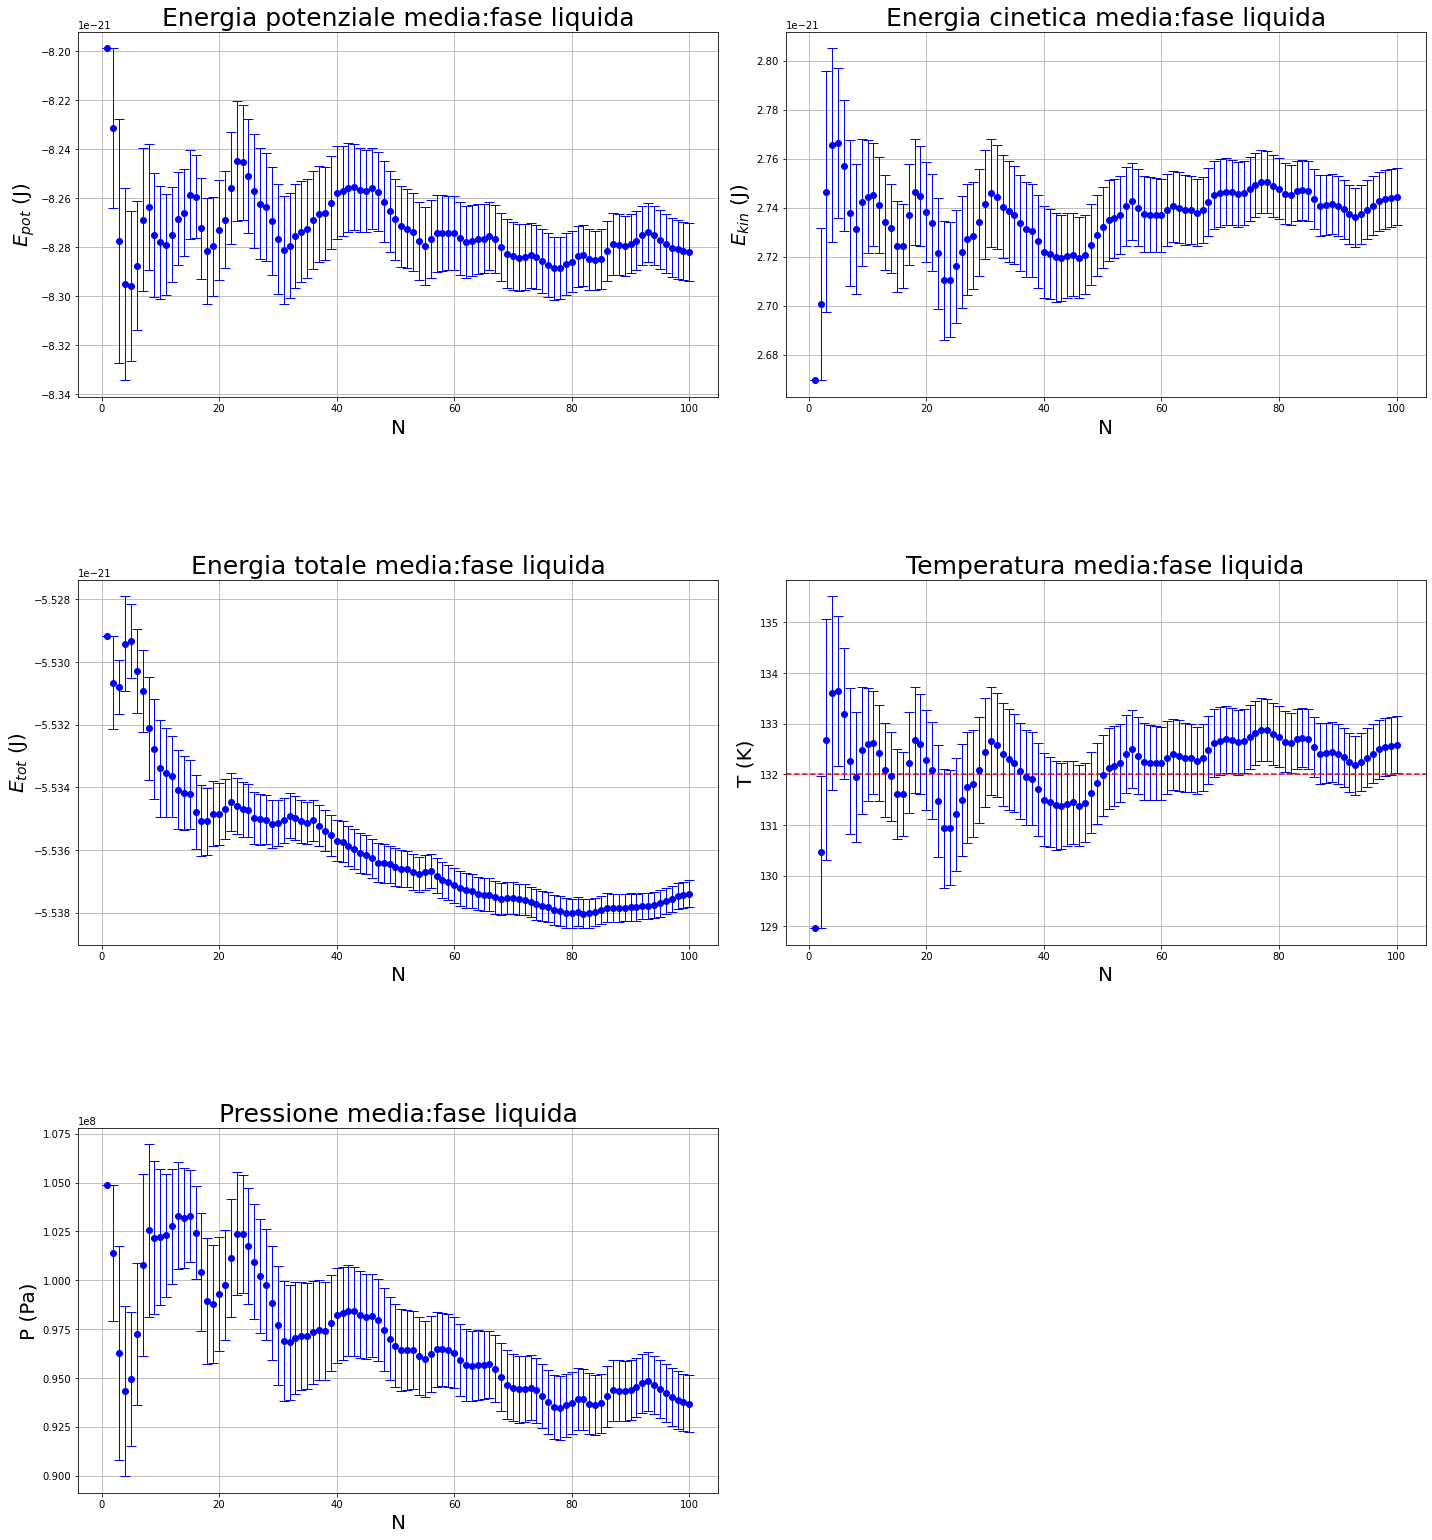

In [71]:
plt.figure(figsize=(20,14))

kB = 1.38 * 10**(-23)
eps = 120 * kB
sigma = 0.34 * 10**(-9)
m = 39.948 * 1.66 * 10 **(-27)

plt.subplot(3,2,1)
N, epot_mean, std_epot = np.loadtxt("Liquido/ave_epot.dat", usecols = (0,2,3), unpack=True)
plt.errorbar(N, epot_mean*eps, yerr=std_epot*eps, fmt = "bo", capsize = 5, elinewidth = 1)
plt.grid(True)
plt.xlabel("N", fontsize = 20)
plt.ylabel("$E_{pot}$ (J)", fontsize = 20)
plt.title("Energia potenziale media:fase liquida",fontsize = 25)


plt.subplot(3,2,2)
N, ekin_mean, std_ekin = np.loadtxt("Liquido/ave_ekin.dat", usecols = (0,2,3), unpack=True)
plt.errorbar(N, ekin_mean*eps, yerr=std_ekin*eps, fmt = "bo", capsize = 5, elinewidth = 1)
plt.grid(True)
plt.xlabel("N", fontsize = 20)
plt.ylabel("$E_{kin}$ (J)", fontsize = 20)
plt.title("Energia cinetica media:fase liquida", fontsize = 25)


plt.subplot(3,2,3)
N, etot_mean, std_etot = np.loadtxt("Liquido/ave_etot.dat", usecols = (0,2,3), unpack=True)
plt.errorbar(N, etot_mean*eps, yerr=std_etot*eps, fmt = "bo", capsize = 5, elinewidth = 1)
plt.grid(True)
plt.xlabel("N", fontsize = 20)
plt.ylabel("$E_{tot}$ (J)", fontsize = 20)
plt.title("Energia totale media:fase liquida", fontsize = 25)

plt.subplot(3,2,4)
N, temp_mean, std_temp = np.loadtxt("Liquido/ave_temp.dat", usecols = (0,2,3), unpack=True)
plt.errorbar(N, temp_mean*eps/kB, yerr=std_temp*eps/kB, fmt = "bo", capsize = 5, elinewidth = 1)
plt.grid(True)
plt.xlabel("N", fontsize = 20)
plt.ylabel("T (K)", fontsize = 20)
plt.axhline(y = 132, color = 'r', linestyle = '--')
plt.title("Temperatura media:fase liquida", fontsize = 25)


plt.subplot(3,2,5)
N, pres_mean, std_pres = np.loadtxt("Liquido/ave_pres.dat", usecols = (0,2,3), unpack=True)
plt.errorbar(N, pres_mean*(eps/sigma**3), yerr=std_pres*(eps/sigma**3), fmt = "bo", capsize = 5, elinewidth = 1)
plt.grid(True)
plt.xlabel("N", fontsize = 20)
plt.ylabel("P (Pa)", fontsize = 20)
plt.title("Pressione media:fase liquida", fontsize = 25)

plt.tight_layout()
plt.subplots_adjust(top=1.5,hspace=0.5)
plt.show()

#### Valori medi per la fase gassosa

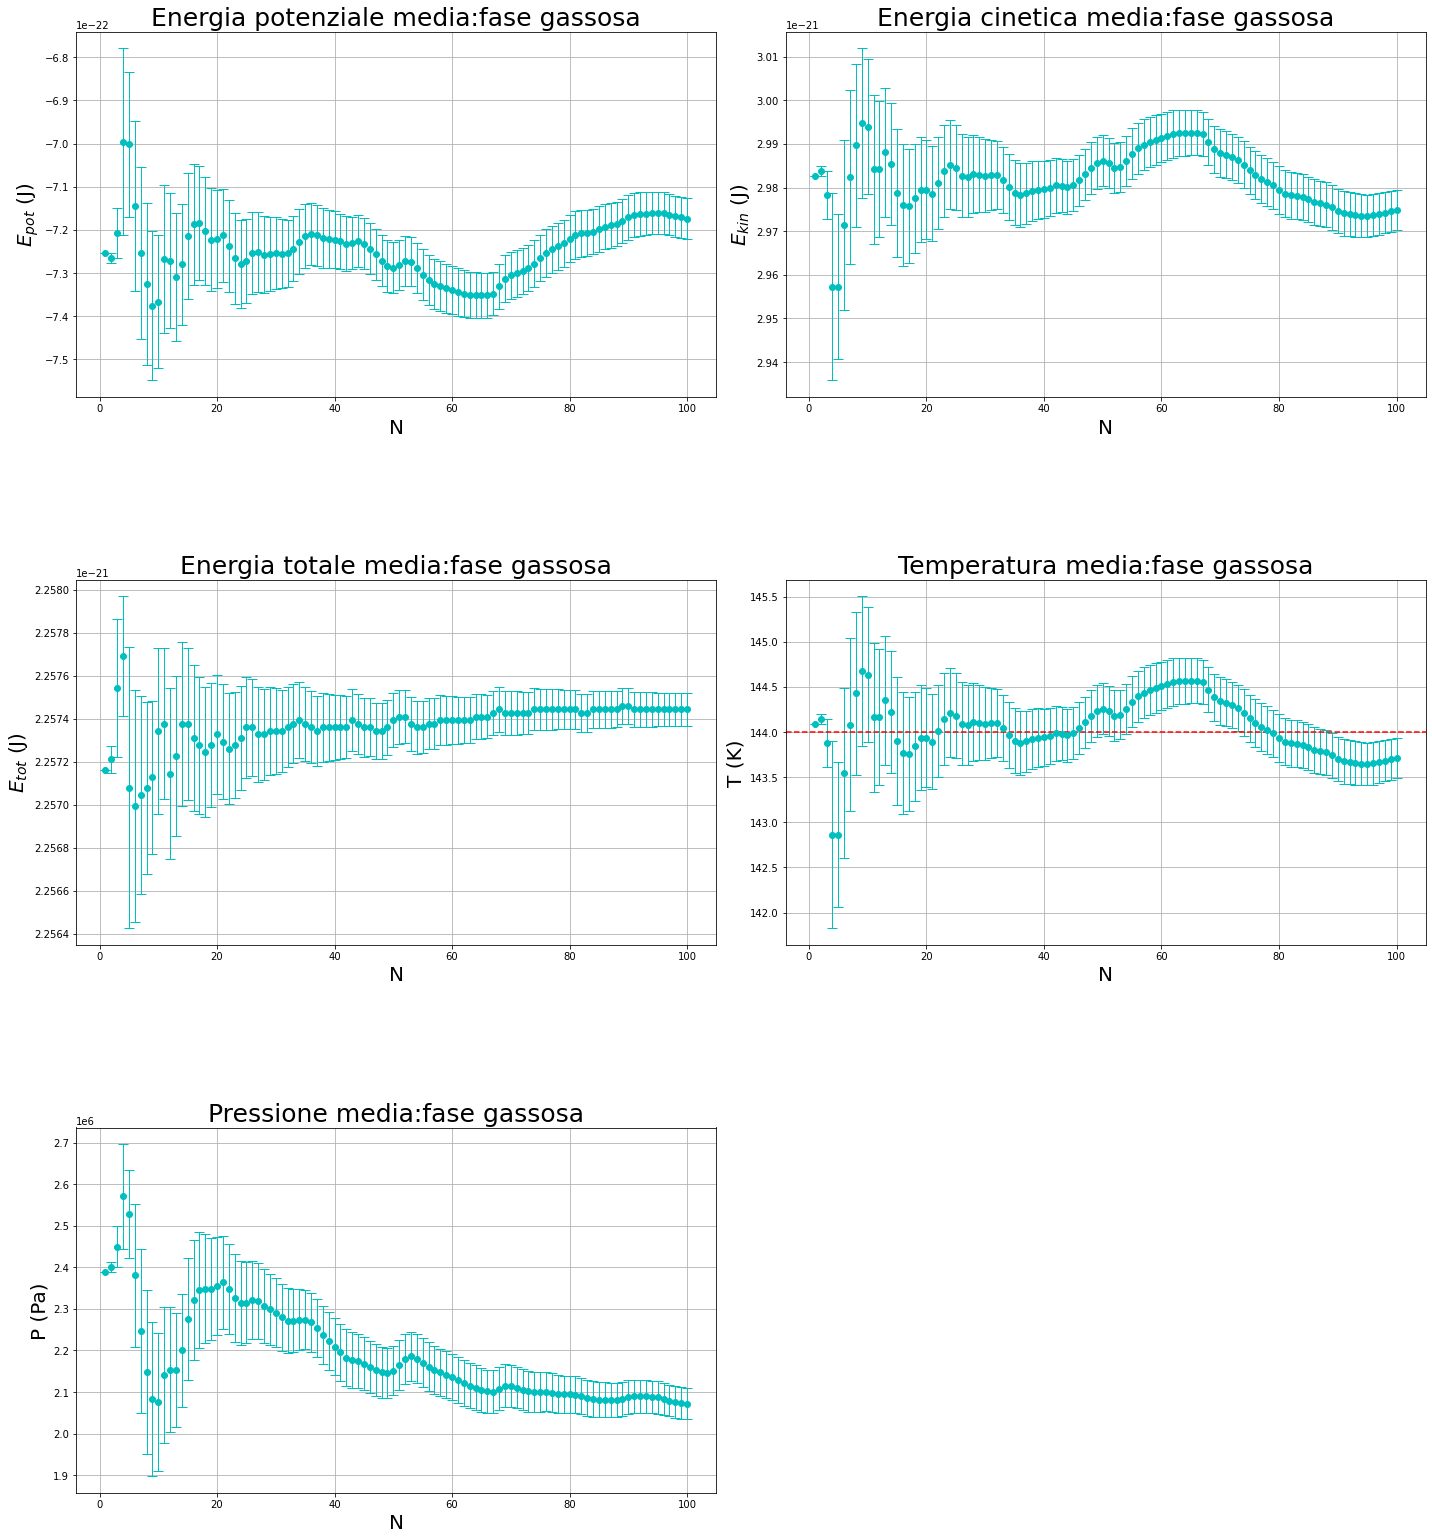

In [72]:
plt.figure(figsize=(20,14))

kB = 1.38 * 10**(-23)
eps = 120 * kB
sigma = 0.34 * 10**(-9)
m = 39.948 * 1.66 * 10 **(-27)

plt.subplot(3,2,1)
N, epot_mean, std_epot = np.loadtxt("Gas/ave_epot.dat", usecols = (0,2,3), unpack=True)
plt.errorbar(N, epot_mean*eps, yerr=std_epot*eps, fmt = "co", capsize = 5, elinewidth = 1)
plt.grid(True)
plt.xlabel("N", fontsize = 20)
plt.ylabel("$E_{pot}$ (J)", fontsize = 20)
plt.title("Energia potenziale media:fase gassosa",fontsize = 25)


plt.subplot(3,2,2)
N, ekin_mean, std_ekin = np.loadtxt("Gas/ave_ekin.dat", usecols = (0,2,3), unpack=True)
plt.errorbar(N, ekin_mean*eps, yerr=std_ekin*eps, fmt = "co", capsize = 5, elinewidth = 1)
plt.grid(True)
plt.xlabel("N", fontsize = 20)
plt.ylabel("$E_{kin}$ (J)", fontsize = 20)
plt.title("Energia cinetica media:fase gassosa", fontsize = 25)


plt.subplot(3,2,3)
N, etot_mean, std_etot = np.loadtxt("Gas/ave_etot.dat", usecols = (0,2,3), unpack=True)
plt.errorbar(N, etot_mean*eps, yerr=std_etot*eps, fmt = "co", capsize = 5, elinewidth = 1)
plt.grid(True)
plt.xlabel("N", fontsize = 20)
plt.ylabel("$E_{tot}$ (J)", fontsize = 20)
plt.title("Energia totale media:fase gassosa", fontsize = 25)

plt.subplot(3,2,4)
N, temp_mean, std_temp = np.loadtxt("Gas/ave_temp.dat", usecols = (0,2,3), unpack=True)
plt.errorbar(N, temp_mean*eps/kB, yerr=std_temp*eps/kB, fmt = "co", capsize = 5, elinewidth = 1)
plt.grid(True)
plt.xlabel("N", fontsize = 20)
plt.ylabel("T (K)", fontsize = 20)
plt.axhline(y = 144, color = 'r', linestyle = '--')
plt.title("Temperatura media:fase gassosa", fontsize = 25)


plt.subplot(3,2,5)
N, pres_mean, std_pres = np.loadtxt("Gas/ave_pres.dat", usecols = (0,2,3), unpack=True)
plt.errorbar(N, pres_mean*(eps/sigma**3), yerr=std_pres*(eps/sigma**3), fmt = "co", capsize = 5, elinewidth = 1)
plt.grid(True)
plt.xlabel("N", fontsize = 20)
plt.ylabel("P (Pa)", fontsize = 20)
plt.title("Pressione media:fase gassosa", fontsize = 25)

plt.tight_layout()
plt.subplots_adjust(top=1.5,hspace=0.5)
plt.show()

In tutte le fasi simulate si è riuscito a raggiungere (entro una deviazione standard di circa $2\sigma$ per la fase solida) la temperatura target.

### Correzioni di coda

I risultati mostrati non tengono conto delle correzioni di coda, utili per correggere la mancanza del contributo a lungo range del potenziale dovuto all'utilizzo di un cut-off sferico con raggio $r_{c}$, per il quale $V(r) = 0$ per $r > r_{c}$. Esse sono date da

$$<V_{LJ}> = \frac{8\pi \rho_{LJ} \epsilon}{9 r_c^9} - \frac{8\pi \rho_{LJ} \epsilon}{3 r_c^3}$$

$$\frac{<W_{LJ}>}{3 N\epsilon} = 32\pi \rho_{LJ} \Bigl[\frac{1}{9 r_c^9} - \frac{1}{6 r_c^3}\Bigr]$$

ed interessano dunque soltanto i valori di $E_{pot}$ e $P$. 

Nei seguenti grafici viene mostrato l'effetto dell'aggiunta delle correzioni di coda nel calcolo dei valor medi; vengono inoltre confrontati i risultati dell'energia potenziale e della pressione con quelli ottenuti nell'_Esercitazione 7_ utilizzando una simulazione MonteCarlo. 

#### Fase solida

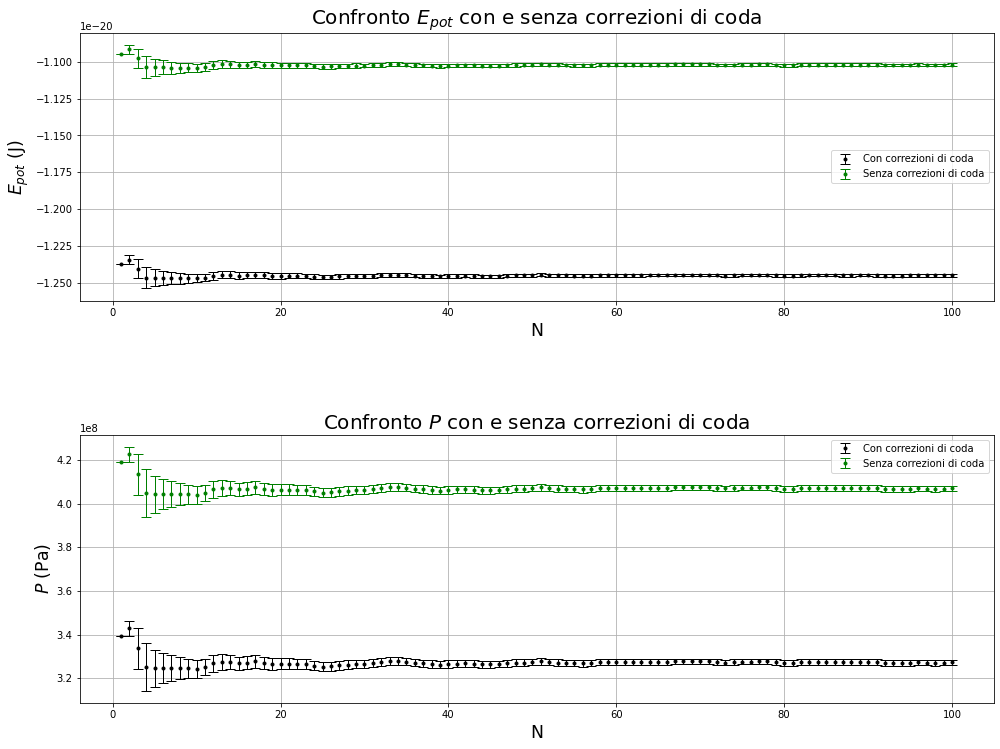

In [46]:
plt.figure(figsize=(14,10))
#Tail correction E_pot: V_LJ = -0,862908
#Tail correction P: W_LJ/3N = -1,72073
kB = 1.38 * 10**(-23)
eps = 120 * kB
sigma = 0.34 * 10**(-9)
m = 39.948 * 1.66 * 10 **(-27)

plt.subplot(2,1,1)
N, epot_4, std_epot_4 = np.loadtxt("Tail corrections/Solido/ave_epot.dat", usecols = (0,2,3), unpack=True)
N_1, epot, std_epot = np.loadtxt("Solido/ave_epot.dat", usecols = (0,2,3), unpack=True)
plt.errorbar(N, epot_4*eps, yerr=std_epot_4*eps, fmt = "k.", capsize = 5, elinewidth = 1, label = "Con correzioni di coda")
plt.errorbar(N_1, epot*eps, yerr=std_epot*eps, fmt = "g.", capsize = 5, elinewidth = 1,label = "Senza correzioni di coda")
plt.grid(True)
plt.xlabel("N", fontsize = "xx-large")
plt.ylabel("$E_{pot}$ (J)", fontsize = "xx-large")
plt.title("Confronto $E_{pot}$ con e senza correzioni di coda", fontsize = 20)
plt.legend(loc="best")

plt.subplot(2,1,2)
N, pres_tail, std_pres_tail = np.loadtxt("Tail corrections/Solido/ave_pres.dat", usecols = (0,2,3), unpack=True)
N_1, pres, std_pres = np.loadtxt("Solido/ave_pres.dat", usecols = (0,2,3), unpack=True)
plt.errorbar(N, pres_tail*(eps/sigma**3), yerr=std_pres_tail*(eps/sigma**3), fmt = "k.", capsize = 5, elinewidth = 1, label = "Con correzioni di coda")
plt.errorbar(N_1, pres*(eps/sigma**3), yerr=std_pres*(eps/sigma**3), fmt = "g.", capsize = 5, elinewidth = 1,label = "Senza correzioni di coda")
plt.grid(True)
plt.xlabel("N", fontsize = "xx-large")
plt.ylabel("$P$ (Pa)", fontsize = "xx-large")
plt.title("Confronto $P$ con e senza correzioni di coda", fontsize = 20)
plt.legend(loc="best")

plt.tight_layout()
plt.subplots_adjust(top=1.,hspace=0.5)
plt.show()

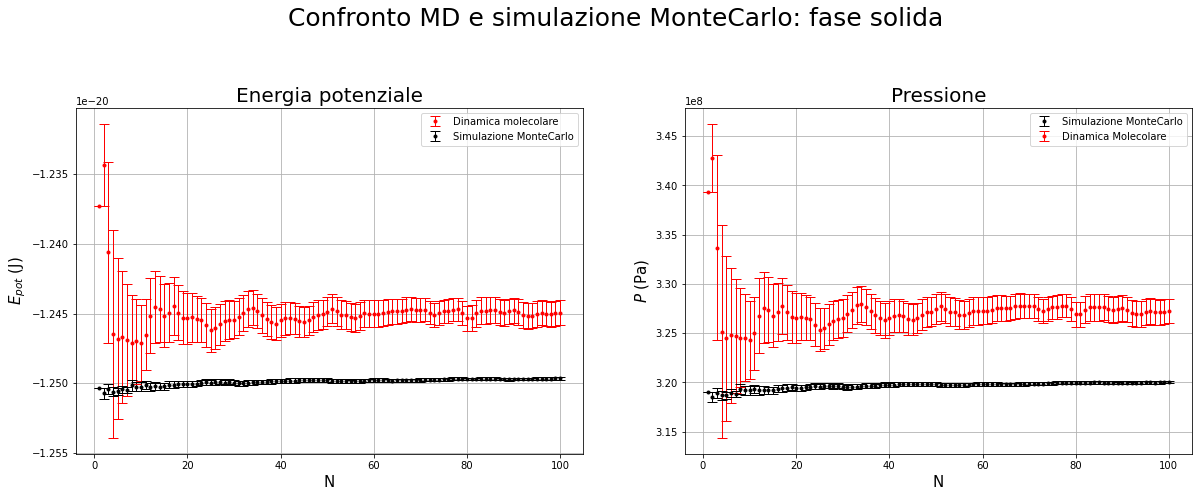

In [54]:
plt.figure(figsize=(20,14))
#Confronto tra i plot dell'energia potenziale media e della pressione media svolti con un codice di dinamica molecolare e
#con una simulazione di tipo MonteCarlo, tenendo conto delle correzioni di coda
kB = 1.38 * 10**(-23)
eps = 120 * kB
sigma = 0.34 * 10**(-9)
m = 39.948 * 1.66 * 10 **(-27)

plt.subplot(2,2,1)
N, epot_mean_MD, std_epot_MD = np.loadtxt("Tail corrections/Solido/ave_epot.dat", usecols = (0,2,3), unpack=True)
N, epot_mean, std_epot = np.loadtxt("Tail corrections/Solido/output.epot.0", usecols = (0,2,3), unpack=True)
plt.errorbar(N, epot_mean_MD*eps, yerr=std_epot_MD*eps, fmt = "r.", capsize = 5, elinewidth = 1, label = "Dinamica molecolare")
plt.errorbar(N, epot_mean*eps, yerr=std_epot*eps, fmt = "k.", capsize = 5, elinewidth = 1, label = "Simulazione MonteCarlo")
plt.grid(True)
plt.xlabel("N", fontsize = 15)
plt.ylabel("$E_{pot}$ (J)", fontsize = 15)
plt.title("Energia potenziale", fontsize = 20)
plt.legend(loc="best")

plt.subplot(2,2,2)
N, pres_mean, std_pres = np.loadtxt("Tail corrections/Solido/output.pres.0", usecols = (0,2,3), unpack=True)
N, pres_mean_MD, std_pres_MD = np.loadtxt("Tail corrections/Solido/ave_pres.dat", usecols = (0,2,3), unpack=True)
plt.errorbar(N, pres_mean*(eps/sigma**3), yerr=std_pres*(eps/sigma**3), fmt = "k.",capsize = 5, elinewidth = 1, label = "Simulazione MonteCarlo")
plt.errorbar(N, pres_mean_MD*(eps/sigma**3), yerr=std_pres_MD*(eps/sigma**3), fmt = "r.", capsize = 5, elinewidth = 1, label = "Dinamica Molecolare")
plt.grid(True)
plt.xlabel("N", fontsize = 15)
plt.ylabel("$P$ (Pa)", fontsize = 15)
plt.title("Pressione", fontsize = 20)
plt.legend(loc="best")



plt.suptitle("Confronto MD e simulazione MonteCarlo: fase solida",fontsize =25)
plt.show()

#### Fase liquida

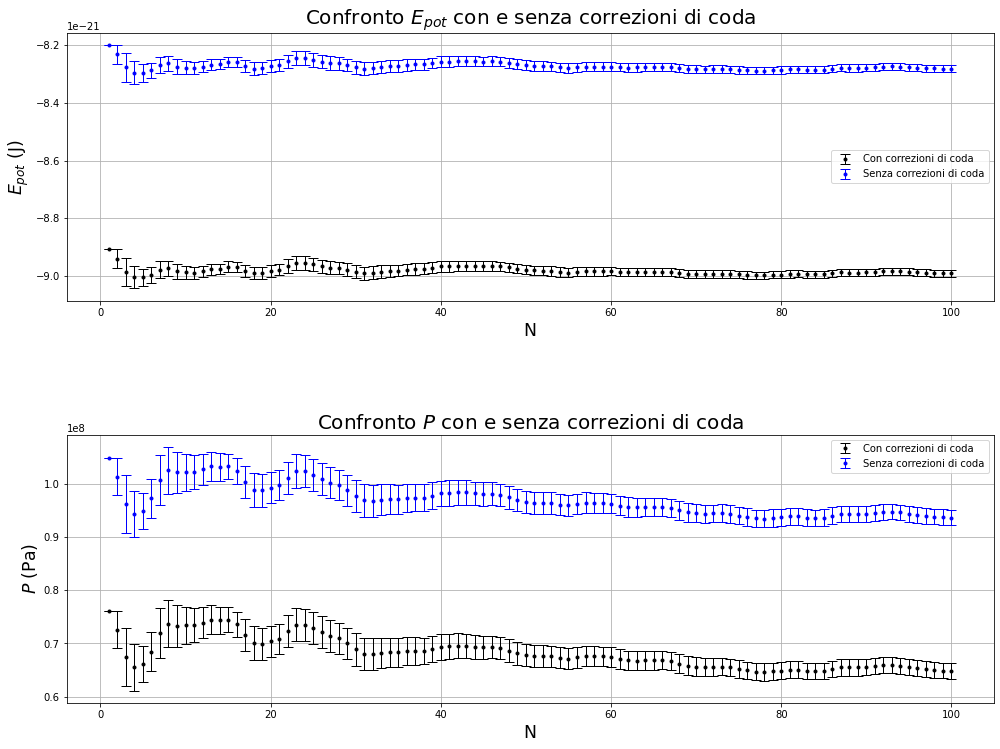

In [61]:
plt.figure(figsize=(14,10))
#Tail correction E_pot: V_LJ = -0,428346
#Tail correction P: W_LJ/3N = -0,855522
kB = 1.38 * 10**(-23)
eps = 120 * kB
sigma = 0.34 * 10**(-9)
m = 39.948 * 1.66 * 10 **(-27)

plt.subplot(2,1,1)
N, epot_4, std_epot_4 = np.loadtxt("Tail corrections/Liquido/ave_epot.dat", usecols = (0,2,3), unpack=True)
N_1, epot, std_epot = np.loadtxt("Liquido/ave_epot.dat", usecols = (0,2,3), unpack=True)
plt.errorbar(N, epot_4*eps, yerr=std_epot_4*eps, fmt = "k.", capsize = 5, elinewidth = 1, label = "Con correzioni di coda")
plt.errorbar(N_1, epot*eps, yerr=std_epot*eps, fmt = "b.", capsize = 5, elinewidth = 1,label = "Senza correzioni di coda")
plt.grid(True)
plt.xlabel("N", fontsize = "xx-large")
plt.ylabel("$E_{pot}$ (J)", fontsize = "xx-large")
plt.title("Confronto $E_{pot}$ con e senza correzioni di coda", fontsize = 20)
plt.legend(loc="best")

plt.subplot(2,1,2)
N, pres_tail, std_pres_tail = np.loadtxt("Tail corrections/Liquido/ave_pres.dat", usecols = (0,2,3), unpack=True)
N_1, pres, std_pres = np.loadtxt("Liquido/ave_pres.dat", usecols = (0,2,3), unpack=True)
plt.errorbar(N, pres_tail*(eps/sigma**3), yerr=std_pres_tail*(eps/sigma**3), fmt = "k.", capsize = 5, elinewidth = 1, label = "Con correzioni di coda")
plt.errorbar(N_1, pres*(eps/sigma**3), yerr=std_pres*(eps/sigma**3), fmt = "b.", capsize = 5, elinewidth = 1,label = "Senza correzioni di coda")
plt.grid(True)
plt.xlabel("N", fontsize = "xx-large")
plt.ylabel("$P$ (Pa)", fontsize = "xx-large")
plt.title("Confronto $P$ con e senza correzioni di coda", fontsize = 20)
plt.legend(loc="best")

plt.tight_layout()
plt.subplots_adjust(top=1.,hspace=0.5)
plt.show()

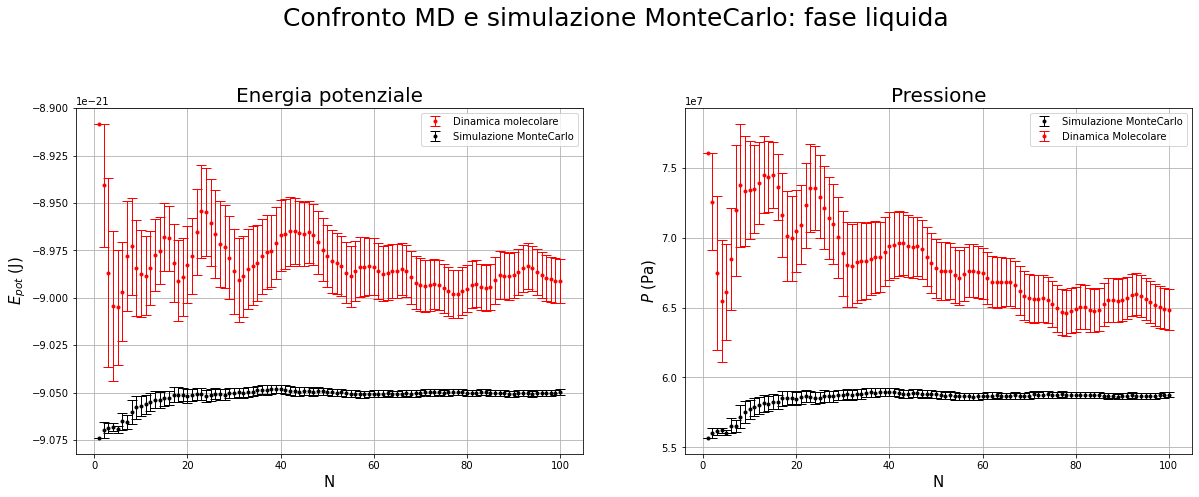

In [59]:
plt.figure(figsize=(20,14))
#Confronto tra i plot dell'energia potenziale media e della pressione media svolti con un codice di dinamica molecolare e
#con una simulazione di tipo MonteCarlo, tenendo conto delle correzioni di coda
kB = 1.38 * 10**(-23)
eps = 120 * kB
sigma = 0.34 * 10**(-9)
m = 39.948 * 1.66 * 10 **(-27)

plt.subplot(2,2,1)
N, epot_mean_MD, std_epot_MD = np.loadtxt("Tail corrections/Liquido/ave_epot.dat", usecols = (0,2,3), unpack=True)
N, epot_mean, std_epot = np.loadtxt("Tail corrections/Liquido/output.epot.0", usecols = (0,2,3), unpack=True)
plt.errorbar(N, epot_mean_MD*eps, yerr=std_epot_MD*eps, fmt = "r.", capsize = 5, elinewidth = 1, label = "Dinamica molecolare")
plt.errorbar(N, epot_mean*eps, yerr=std_epot*eps, fmt = "k.", capsize = 5, elinewidth = 1, label = "Simulazione MonteCarlo")
plt.grid(True)
plt.xlabel("N", fontsize = 15)
plt.ylabel("$E_{pot}$ (J)", fontsize = 15)
plt.title("Energia potenziale", fontsize = 20)
plt.legend(loc="best")

plt.subplot(2,2,2)
N, pres_mean, std_pres = np.loadtxt("Tail corrections/Liquido/output.pres.0", usecols = (0,2,3), unpack=True)
N, pres_mean_MD, std_pres_MD = np.loadtxt("Tail corrections/Liquido/ave_pres.dat", usecols = (0,2,3), unpack=True)
plt.errorbar(N, pres_mean*(eps/sigma**3), yerr=std_pres*(eps/sigma**3), fmt = "k.",capsize = 5, elinewidth = 1, label = "Simulazione MonteCarlo")
plt.errorbar(N, pres_mean_MD*(eps/sigma**3), yerr=std_pres_MD*(eps/sigma**3), fmt = "r.", capsize = 5, elinewidth = 1, label = "Dinamica Molecolare")
plt.grid(True)
plt.xlabel("N", fontsize = 15)
plt.ylabel("$P$ (Pa)", fontsize = 15)
plt.title("Pressione", fontsize = 20)
plt.legend(loc="best")



plt.suptitle("Confronto MD e simulazione MonteCarlo: fase liquida",fontsize =25)
plt.show()

#### Fase gassosa

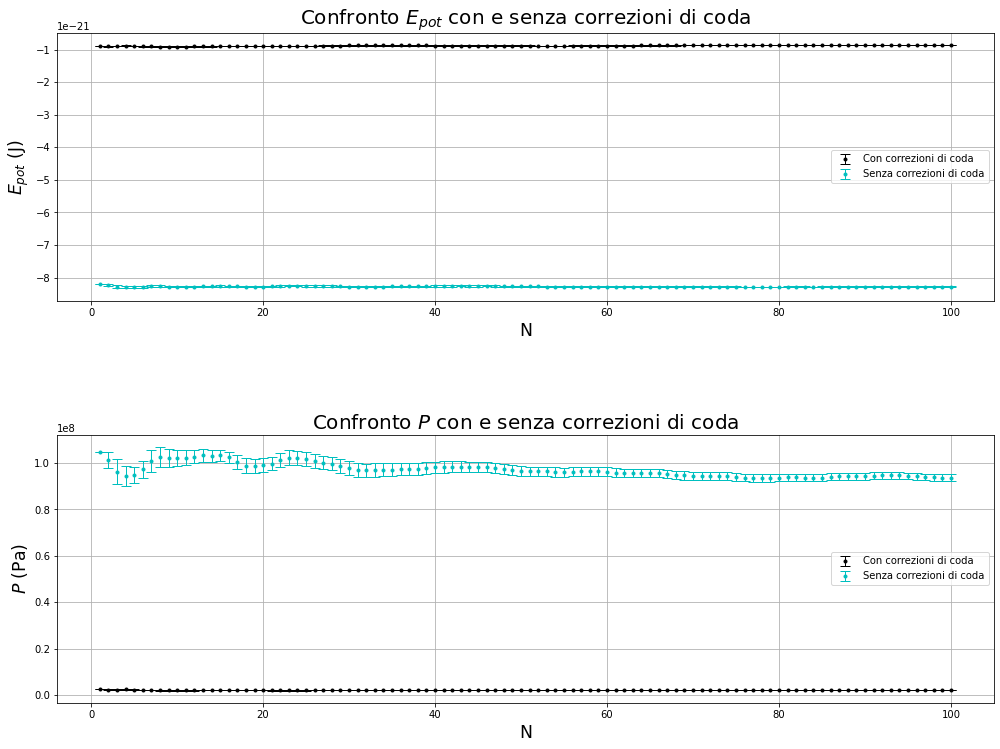

In [62]:
plt.figure(figsize=(14,10))
#Tail correction E_pot: V_LJ = -0,00335096
#Tail correction P: W_LJ/3N = -0,00670178
kB = 1.38 * 10**(-23)
eps = 120 * kB
sigma = 0.34 * 10**(-9)
m = 39.948 * 1.66 * 10 **(-27)

plt.subplot(2,1,1)
N, epot_4, std_epot_4 = np.loadtxt("Tail corrections/Gas/ave_epot.dat", usecols = (0,2,3), unpack=True)
N_1, epot, std_epot = np.loadtxt("Liquido/ave_epot.dat", usecols = (0,2,3), unpack=True)
plt.errorbar(N, epot_4*eps, yerr=std_epot_4*eps, fmt = "k.", capsize = 5, elinewidth = 1, label = "Con correzioni di coda")
plt.errorbar(N_1, epot*eps, yerr=std_epot*eps, fmt = "c.", capsize = 5, elinewidth = 1,label = "Senza correzioni di coda")
plt.grid(True)
plt.xlabel("N", fontsize = "xx-large")
plt.ylabel("$E_{pot}$ (J)", fontsize = "xx-large")
plt.title("Confronto $E_{pot}$ con e senza correzioni di coda", fontsize = 20)
plt.legend(loc="best")

plt.subplot(2,1,2)
N, pres_tail, std_pres_tail = np.loadtxt("Tail corrections/Gas/ave_pres.dat", usecols = (0,2,3), unpack=True)
N_1, pres, std_pres = np.loadtxt("Liquido/ave_pres.dat", usecols = (0,2,3), unpack=True)
plt.errorbar(N, pres_tail*(eps/sigma**3), yerr=std_pres_tail*(eps/sigma**3), fmt = "k.", capsize = 5, elinewidth = 1, label = "Con correzioni di coda")
plt.errorbar(N_1, pres*(eps/sigma**3), yerr=std_pres*(eps/sigma**3), fmt = "c.", capsize = 5, elinewidth = 1,label = "Senza correzioni di coda")
plt.grid(True)
plt.xlabel("N", fontsize = "xx-large")
plt.ylabel("$P$ (Pa)", fontsize = "xx-large")
plt.title("Confronto $P$ con e senza correzioni di coda", fontsize = 20)
plt.legend(loc="best")

plt.tight_layout()
plt.subplots_adjust(top=1.,hspace=0.5)
plt.show()

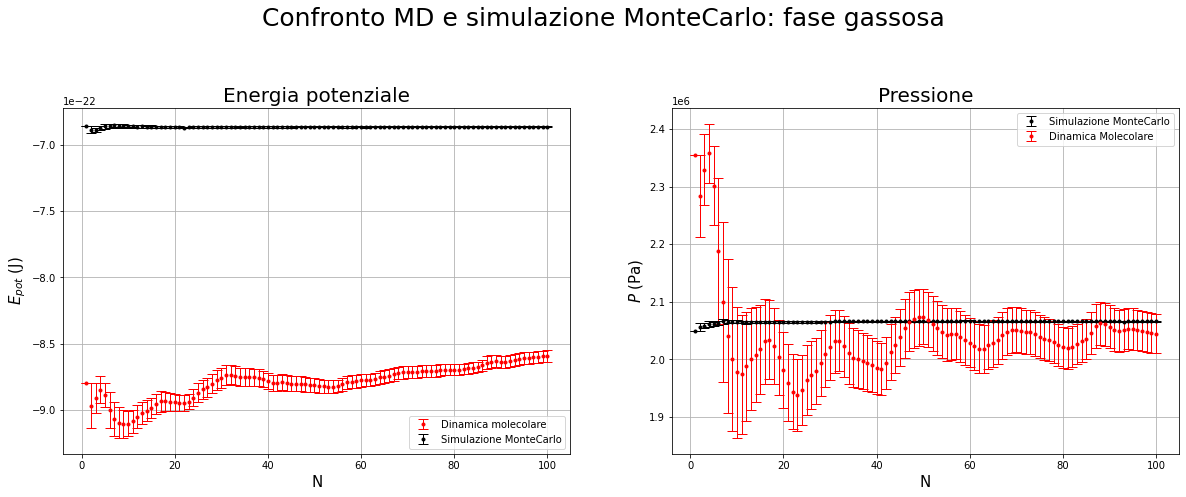

In [63]:
plt.figure(figsize=(20,14))
#Confronto tra i plot dell'energia potenziale media e della pressione media svolti con un codice di dinamica molecolare e
#con una simulazione di tipo MonteCarlo, tenendo conto delle correzioni di coda
kB = 1.38 * 10**(-23)
eps = 120 * kB
sigma = 0.34 * 10**(-9)
m = 39.948 * 1.66 * 10 **(-27)

plt.subplot(2,2,1)
N, epot_mean_MD, std_epot_MD = np.loadtxt("Tail corrections/Gas/ave_epot.dat", usecols = (0,2,3), unpack=True)
N, epot_mean, std_epot = np.loadtxt("Tail corrections/Gas/output.epot.0", usecols = (0,2,3), unpack=True)
plt.errorbar(N, epot_mean_MD*eps, yerr=std_epot_MD*eps, fmt = "r.", capsize = 5, elinewidth = 1, label = "Dinamica molecolare")
plt.errorbar(N, epot_mean*eps, yerr=std_epot*eps, fmt = "k.", capsize = 5, elinewidth = 1, label = "Simulazione MonteCarlo")
plt.grid(True)
plt.xlabel("N", fontsize = 15)
plt.ylabel("$E_{pot}$ (J)", fontsize = 15)
plt.title("Energia potenziale", fontsize = 20)
plt.legend(loc="best")

plt.subplot(2,2,2)
N, pres_mean, std_pres = np.loadtxt("Tail corrections/Gas/output.pres.0", usecols = (0,2,3), unpack=True)
N, pres_mean_MD, std_pres_MD = np.loadtxt("Tail corrections/Gas/ave_pres.dat", usecols = (0,2,3), unpack=True)
plt.errorbar(N, pres_mean*(eps/sigma**3), yerr=std_pres*(eps/sigma**3), fmt = "k.",capsize = 5, elinewidth = 1, label = "Simulazione MonteCarlo")
plt.errorbar(N, pres_mean_MD*(eps/sigma**3), yerr=std_pres_MD*(eps/sigma**3), fmt = "r.", capsize = 5, elinewidth = 1, label = "Dinamica Molecolare")
plt.grid(True)
plt.xlabel("N", fontsize = 15)
plt.ylabel("$P$ (Pa)", fontsize = 15)
plt.title("Pressione", fontsize = 20)
plt.legend(loc="best")



plt.suptitle("Confronto MD e simulazione MonteCarlo: fase gassosa",fontsize =25)
plt.show()

### Pair distribution function per i diversi stati del sistema

Come richiesto nell'_Esercitazione 7_, si è aggiunto nel codice di Dinamica Molecolare il calcolo della funzione di distribuzione a coppie per i diversi stati in cui si valuta il sistema. 

La funzione di distribuzione a coppie, $g(r)$, esprime la probabilità di trovare una coppia di atomi a distanza $r$ rispettivamente alla probabilità che ci si aspetta per una distribuzione casuale di atomi che si trovano alla stessa densità. Indica quanto più denso è il sistema a distanza $r$ rispetto al caso del gas ideale, per cui $g(r) = 1$.

Poiché il nostro sistema risente di un potenziale interatomico a coppie del tipo 
    $$ V(\vec{r}_{1}...\vec{r}_{N}) = \frac{1}{2} \sum_{i=1}^N \sum_{j=1}^N V(|\vec{r}_{i}-\vec{r}_{j}|), \quad i \neq j$$
    
allora la funzione $g(r)$ può essere utile nell'espressione di alcune osservabili medie, come ad esempio l'energia potenziale.

Si noti come
- Vicino all'origine $g(r) = 0$: ciò è dovuto all'azione del potenziale interatomico a short-range, che non permette ai due atomi di avvicinarsi
- Per grandi distanze $g(r) \rightarrow 1$, avvicinandosi al caso del gas ideale

Nei seguenti grafici è mostrata la funzione di distribuzione a coppie per i diversi stati, utilizzando la distanza di Lennard-Jones $r^\star = \frac{r}{\sigma}$

#### Fase solida

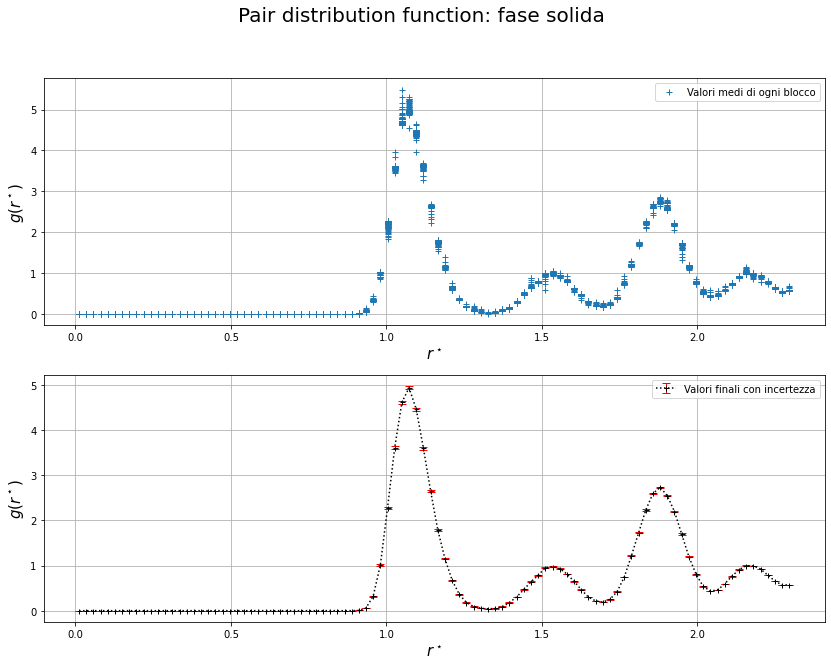

In [2]:
plt.figure(figsize=(14,10))
#Pair distribution function per lo stato solido
plt.subplot(2,1,1)
r, g_r = np.loadtxt('Solido/output.gofr.0', usecols = (1, 2), unpack = True)
plt.plot(r,g_r, "+", label = "Valori medi di ogni blocco")
plt.xlabel("$r^\star$", fontsize = 15)
plt.ylabel("$g(r^\star)$", fontsize = 15)
plt.legend()
plt.grid(True)

plt.subplot(2,1,2)
r, g_r,std = np.loadtxt('Solido/output.gave.0', usecols = (0, 1, 2), unpack = True)
plt.errorbar(r,g_r, yerr = std, fmt = "+k:", ecolor = "red", elinewidth=1, markersize=5, capsize = 4, 
             label = "Valori finali con incertezza")
plt.xlabel("$r^\star$", fontsize = 15)
plt.ylabel("$g(r^\star)$", fontsize = 15)
plt.grid(True)
plt.legend()
plt.suptitle("Pair distribution function: fase solida", fontsize = 20)
plt.show()

#### Fase liquida

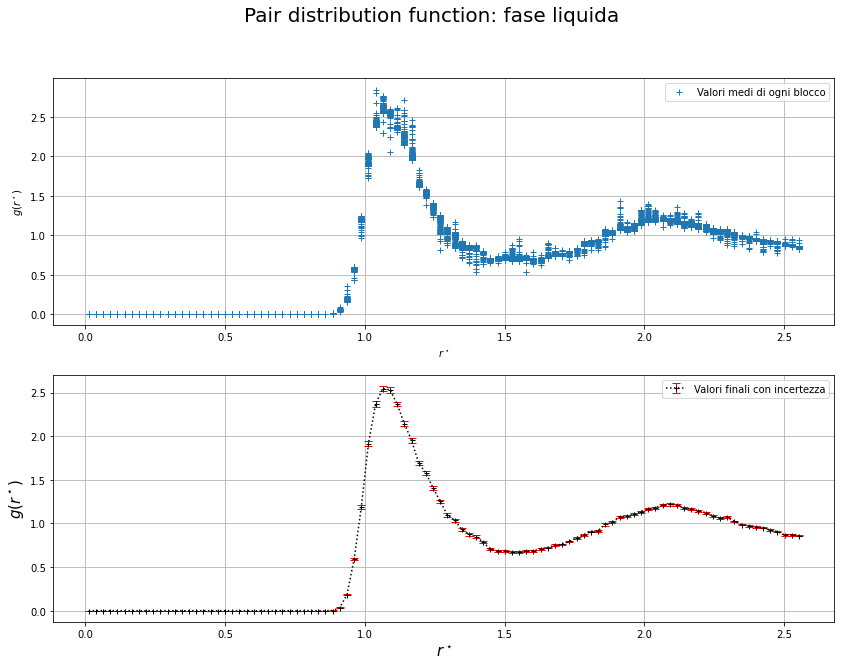

In [3]:
plt.figure(figsize=(14,10))
#Pair distribution function per lo stato liquido
plt.subplot(2,1,1)
r, g_r = np.loadtxt('Liquido/output.gofr.0', usecols = (1, 2), unpack = True)
plt.plot(r,g_r, "+", label = "Valori medi di ogni blocco")
plt.xlabel("$r^\star$")
plt.ylabel("$g(r^\star)$")
plt.legend()
plt.grid(True)

plt.subplot(2,1,2)
r, g_r,std = np.loadtxt('Liquido/output.gave.0', usecols = (0, 1, 2), unpack = True)
plt.errorbar(r,g_r, yerr = std, fmt = "+k:", ecolor = "red", elinewidth=1, markersize=5, capsize = 4, 
             label = "Valori finali con incertezza")
plt.xlabel("$r^\star$", fontsize = 15)
plt.ylabel("$g(r^\star)$", fontsize = 15)
plt.grid(True)
plt.suptitle("Pair distribution function: fase liquida", fontsize = 20)
plt.legend()
plt.show()

#### Fase gassosa

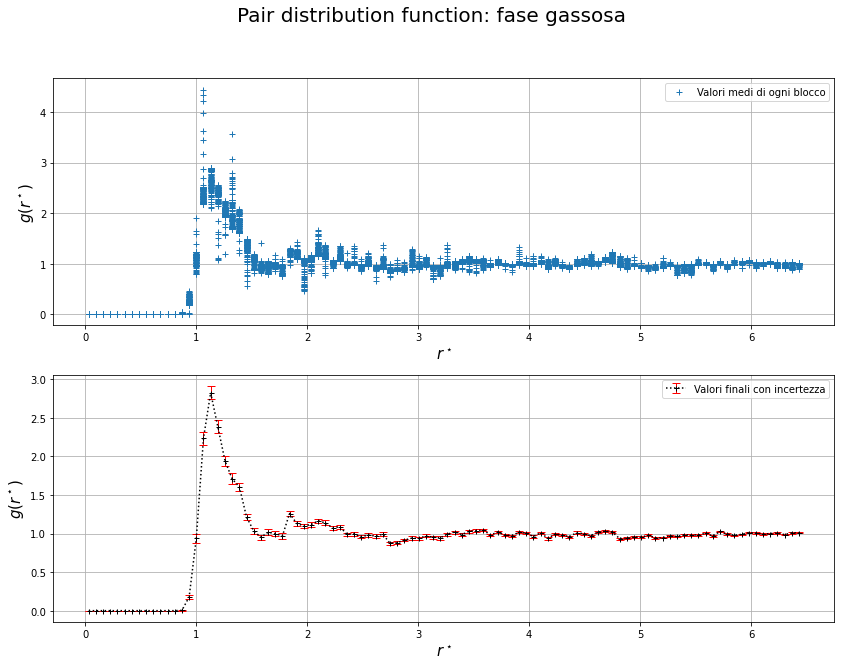

In [4]:
plt.figure(figsize=(14,10))
#Pair distribution function per lo stato gassoso
plt.subplot(2,1,1)
r, g_r = np.loadtxt('Gas/output.gofr.0', usecols = (1, 2), unpack = True)
plt.plot(r,g_r, "+", label = "Valori medi di ogni blocco")
plt.xlabel("$r^\star$", fontsize = 15)
plt.ylabel("$g(r^\star)$", fontsize = 15)
plt.legend()
plt.grid(True)

plt.subplot(2,1,2)
r, g_r,std = np.loadtxt('Gas/output.gave.0', usecols = (0, 1, 2), unpack = True)
plt.errorbar(r,g_r, yerr = std, fmt = "+k:", ecolor = "red", elinewidth=1, markersize=5, capsize = 4, 
             label = "Valori finali con incertezza")
plt.xlabel("$r^\star$", fontsize = 15)
plt.ylabel("$g(r^\star)$", fontsize = 15)
plt.grid(True)
plt.suptitle("Pair distribution function: fase gassosa", fontsize = 20)
plt.legend()
plt.show()

Dalla funzione di distribuzione a coppie valutata per il gas si può notare come esso non sia un gas perfetto: difatti, mentre per un gas ideale $g(r) = 1$, nel nostro caso vi è un picco a distanze $r^\star$ immediatamente successive ad $1$. Ciò è dovuto al fatto che, essendo il gas non ideale, le molecole a distanze ravvicinate possono subire urti che, seppur rari, avvengono a velocità elevate provocando una modifica delle coordinate delle molecole.

### Configurazione molecolare

Vengono infine in seguito riportate le configurazioni molecolari delle diverse fasi dell'_Argon_, valutate grazie al tool <a href="https://www.ovito.org/about/"> OVITO </a> che permette di visualizzare e analizzare dati derivanti da esperimenti di Dinamica Molecolare. 

Viene mostrata l'evoluzione del sistema durante i primi 100 frames, dove ogni frames corrisponde a circa $1 fs$. Le molecole vengono rappresentate tramite sfere di raggio pari a $0.3$

#### Fase solida

<img src="Solido/solido.gif" alt="solido" width="400" heigth="400" align = "left"/>

#### Fase liquida

<img src="Liquido/liquido.gif" alt="solido" width="400" heigth="400" align = "left"/>

#### Fase gassosa

<img src="Gas/gas2.gif" alt="gas" width="400" heigth="400" align = "left"/>